In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import joblib
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore') 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import joblib
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore') 

import random
pallete = ['Accent_r', 'Blues', 'BrBG', 'BrBG_r', 'BuPu', 'CMRmap', 'CMRmap_r',
           'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'OrRd', 'Oranges', 'Paired',
           'PuBu', 'PuBuGn', 'PuRd', 'Purples', 'RdGy_r', 'RdPu', 'Reds', 'autumn',
           'cool', 'coolwarm', 'flag', 'flare', 'gist_rainbow', 'hot', 'magma',
           'mako', 'plasma', 'prism', 'rainbow', 'rocket', 'seismic', 'spring',
           'summer', 'terrain', 'twilight']

In [2]:
c=pd.read_csv("OurData.csv", nrows = 5000)

In [3]:
c.head()

,station_name,observation_date,elevation,wind_direction_angle,wind_type,wind_speed_rate,sky_ceiling_height,sky_cavok,visibility_distance,air_temperature,atmospheric_sea_level_pressure,Crop.name.in.original.data
0,MINA,2022-11-10 00:00:00+03:00,394.0,360.0,Normal,1.0,3000.0,No,10000.0,27.0,1011.0,Millet
1,MINA,2022-11-10 00:00:00+03:00,394.0,360.0,Normal,1.0,3000.0,No,10000.0,27.0,1011.0,Maize (main)
2,MINA,2022-11-10 00:00:00+03:00,394.0,360.0,Normal,1.0,3000.0,No,10000.0,27.0,1011.0,Maize (second)
3,MINA,2022-11-10 00:00:00+03:00,394.0,360.0,Normal,1.0,3000.0,No,10000.0,27.0,1011.0,Sorghum
4,MINA,2022-11-10 00:00:00+03:00,394.0,360.0,Normal,1.0,3000.0,No,10000.0,27.0,1011.0,Rice


In [4]:
c.shape

(5000, 12)

In [5]:
c.groupby('wind_type').count()

,station_name,observation_date,elevation,wind_direction_angle,wind_speed_rate,sky_ceiling_height,sky_cavok,visibility_distance,air_temperature,atmospheric_sea_level_pressure,Crop.name.in.original.data
wind_type,,,,,,,,,,,
Normal,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000


In [6]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   station_name                    5000 non-null   object 
 1   observation_date                5000 non-null   object 
 2   elevation                       5000 non-null   float64
 3   wind_direction_angle            5000 non-null   float64
 4   wind_type                       5000 non-null   object 
 5   wind_speed_rate                 5000 non-null   float64
 6   sky_ceiling_height              5000 non-null   float64
 7   sky_cavok                       5000 non-null   object 
 8   visibility_distance             5000 non-null   float64
 9   air_temperature                 5000 non-null   float64
 10  atmospheric_sea_level_pressure  5000 non-null   float64
 11  Crop.name.in.original.data      5000 non-null   object 
dtypes: float64(7), object(5)
memory us

Text(0.5, 1.0, 'Air_temperature regarding to sky cavok')

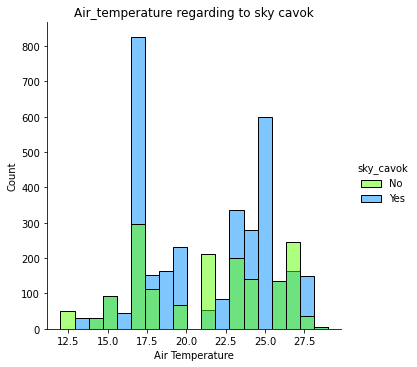

In [7]:
# displot
sns.displot(c, x="air_temperature",hue='sky_cavok',palette=random.choice(pallete))
plt.xlabel("Air Temperature")
plt.ylabel("Count")
plt.title("Air_temperature regarding to sky cavok")

This graph shows the distribution of air temperature relationship to the sky cavok with its ratio on each column to the other as you see. 

The lowest value of temperature is 28 degrees, while The top 3 highest values are in 17, 25, and 23 degrees approximatly.

Text(0.5, 1.0, 'Wind Speed and Air Temperature')

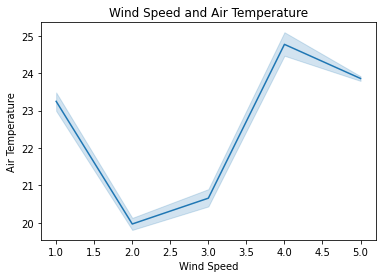

In [8]:
# line plot
sns.lineplot(data=c, x="wind_speed_rate", y="air_temperature",palette=random.choice(pallete))
plt.xlabel("Wind Speed")
plt.ylabel("Air Temperature")
plt.title("Wind Speed and Air Temperature")

On this chart we conclude:
- The highest Average of air_temperature happen at 24.77, when wind_speed value is equal to 4. 
- The lowest Average of air_temperature at 19.97, when wind_speed value is equal to 2.
- Across all 5 wind_speed_rate, Average of air_temperature ranged from 19.97 to 24.77.

Text(0.5, 1.0, 'Air Temperature and wind speed rate to sky_cavok ')

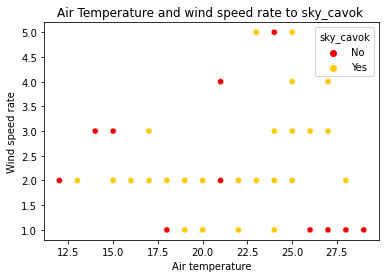

In [9]:
# scatter plot
sns.scatterplot(data=c, x="air_temperature", y="wind_speed_rate", hue='sky_cavok',palette=random.choice(pallete))
plt.xlabel("Air temperature")
plt.ylabel("Wind speed rate")
plt.title("Air Temperature and wind speed rate to sky_cavok ")

This scatter plot shows the air temperature and wind speed rate, And their relationship to the sky cavok, the values are distributed almost randomly, but most of the clear visibility is concentrated on wind speed rate at 2, and most of the Non-clear visibility values are in the wind speed rate at 1.

Text(0.5, 1.0, 'Name of Stations when air_temperature<20 regarding to elevation')

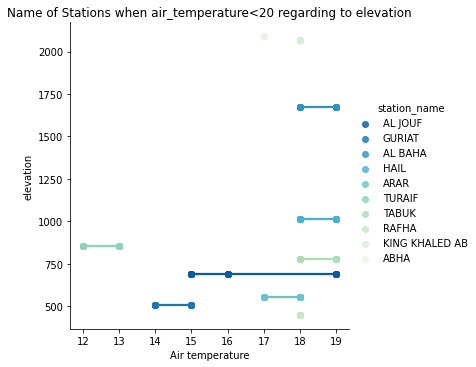

In [10]:
# lmplot
df1 = c.loc[c['air_temperature'] < 20 ] 
lm = sns.lmplot(x='air_temperature', y ='elevation',hue='station_name',data=df1,
                palette=random.choice(pallete))
plt.xlabel("Air temperature")
plt.ylabel("elevation")
plt.title("Name of Stations when air_temperature<20 regarding to elevation")

This graph shows the name of Stations when air_temperature < 20 regarding elevation,
As we look from down to the top, 
-RAFHA has a lower than 500 elevation considered as lowest and its air temp equal to 18
- GURIAT has a little bit above 500 elevation and its air temp between 14 and 15
- ARAR has a little bit above 500 elevation and its air temp between 17 and 18
- ALJOUF has an elevation close to 750 and its air temp between 15 and 19
- TABUK has a little bit above 750 elevation and its air temp  between 18 and 19
-TURAIF has above 800 elevation and its air temp  between 12 and 13
- HAIL has a little bit above 1000 elevation and its air temp  between 18 and 19
- ALBAHA has above 1600 elevation  and its air temp between 18 and 19
-KING KHALED AB has above 2060 elevation and its air temp equal to 18
- ABHA has above 2085 elevation and its air temp equal to 17


Text(0.5, 1.0, 'Name of Stations when air_temperature =20 ')

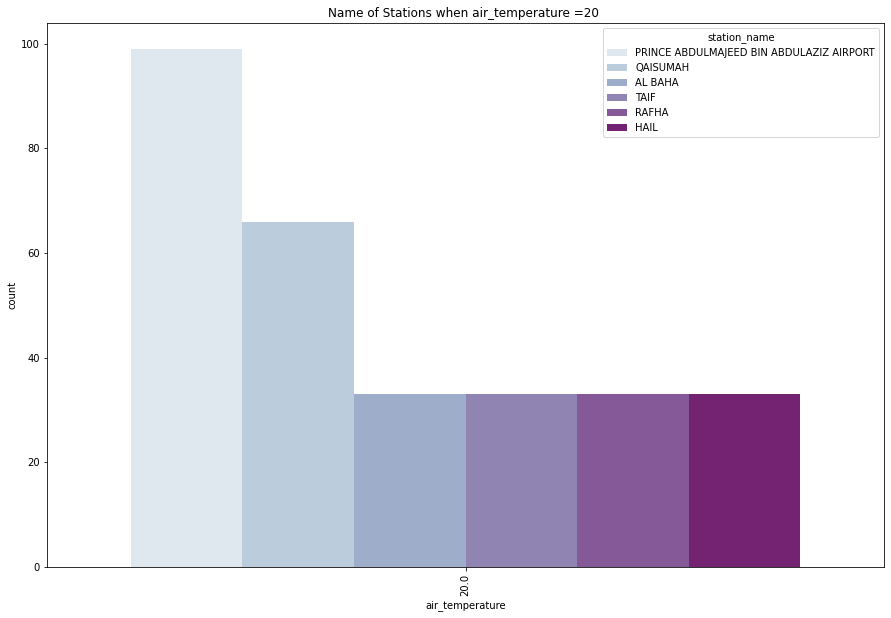

In [11]:
# countplot
df1 = c.loc[c['air_temperature'] ==20 ] 
plt.figure(figsize=(15, 10))
sns.countplot(x="air_temperature", data=df1,hue='station_name', 
              order = df1.groupby(by=['air_temperature'])['station_name'].count().sort_values(ascending=False).index,
              palette=random.choice(pallete))
plt.xticks(rotation=90)
plt.title("Name of Stations when air_temperature =20 ")

We can insight here the Name of Stations when air_temperature =20, which is Prince Abdulmajeed bin Abdulaziz Airport, Qaisumah, AlBaha, Taif, Rafha, and Hail.
We can insight from the names of the stations knowing the appropriate plants to plant in each region, or for airports, weather conditions, and flight times.

Text(0.5, 1.0, 'Appropriate plants when air_temperature =20')

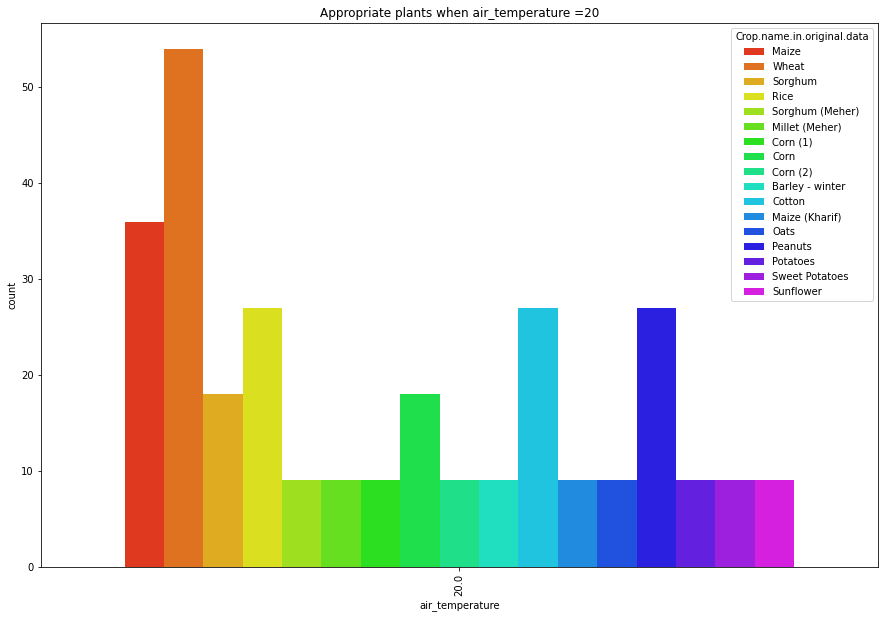

In [12]:
# countplot
df1 = c.loc[c['air_temperature'] ==20 ] 
plt.figure(figsize=(15, 10))
sns.countplot( x="air_temperature", 
               data=df1,hue='Crop.name.in.original.data', 
               order = df1.groupby(by=['air_temperature'])['Crop.name.in.original.data'].count().sort_values(ascending=False).index,
               palette=random.choice(pallete))
plt.xticks(rotation=90)
plt.title("Appropriate plants when air_temperature =20")

What this chart interpret is the Name of appropriate plants when air_temperature =20, which are Maize, Wheat, Sorghum, Rice, Millet, Corn, Barley, Cotton, Oats, Peanuts, Potatoes, and Sunflower.

We can insight from the names of the plants knowing which plants are suitable for each temperature and which plant is the most popular and desirable.

Text(0.5, 1.0, 'The relationship between wind_direction_angle and Air Temperature')

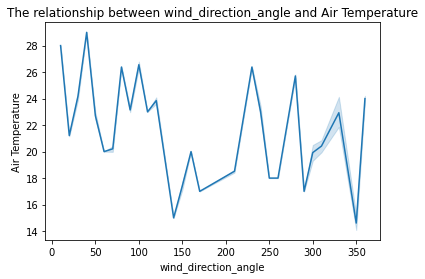

In [13]:
# line plot
sns.lineplot(data=c, x="wind_direction_angle", y="air_temperature", palette=random.choice(pallete))
plt.xlabel("wind_direction_angle")
plt.ylabel("Air Temperature")
plt.title("The relationship between wind_direction_angle and Air Temperature")

On this chart we conclude:
* At 29 air_temperature, 40 wind_direction_angle had the highest Average of air_temperature and was 98.54% higher than 350, which had the lowest Average of air_temperature at 14.61.

* 40 had the highest Average of air_temperature at 29, followed by 10 and 100.
* 350 had the lowest Average of air_temperature at 14.61.

* Across all 28 wind_direction_angle, Average of air_temperature ranged from 14.61 to 29.

Text(0.5, 1.0, 'Boxplot of air_temperature ')

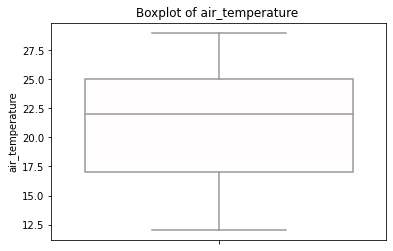

In [14]:
# Boxplot
sns.boxplot(data=c,y="air_temperature",palette=random.choice(pallete))
plt.ylabel("air_temperature")
plt.title("Boxplot of air_temperature ")

This box plot shows the temperature that the maximum temperature is 29 while the minimum temperature is 12 and the median temperature is 22.

Text(0.5, 1.0, 'Violinplot of air_temperature')

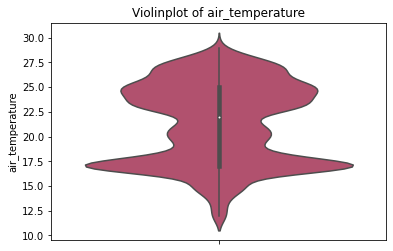

In [15]:
# violinplot
sns.violinplot(data=c,y="air_temperature",palette=random.choice(pallete))
plt.ylabel("air_temperature")
plt.title("Violinplot of air_temperature")

As the violin plot nicely reveals the structure of the data, while a boxplot does not.

This violin plot shows the temperature that the maximum temperature is above 27.5 and the minimum temperature is below 12,5 and the median temperature is 22.5 approximately.

Text(0.5, 1.0, 'Atmospheric sea level pressure and air_temperature')

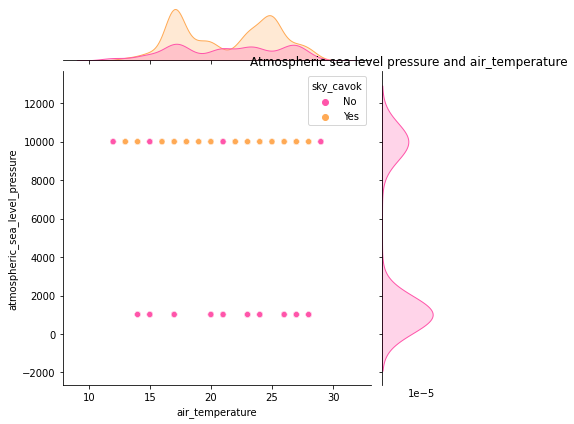

In [16]:
# jointplot
sns.jointplot(data=c, x="air_temperature", y="atmospheric_sea_level_pressure", hue='sky_cavok',palette=random.choice(pallete))
plt.xlabel("air_temperature")
plt.ylabel("atmospheric_sea_level_pressure")
plt.title("Atmospheric sea level pressure and air_temperature")

On this joint plot,
The distribution on the top shows the distribution of air_temperature and the distribution on the right shows the distribution of atmospheric_sea_level_pressure. And the scatter plot represents the usual relationship of air_temperature Vs atmospheric_sea_level_pressure.

As you can see, when a low-pressure moves into an area, it usually leads to cloudiness, wind, and precipitation which makes the sky visibility not clear. High pressure usually leads to fair, calm weather. Therefore, The sky visibility will be more clear Except for some areas based on elevation or other factors.

Text(0.5, 1.0, 'Correlation Heatmap')

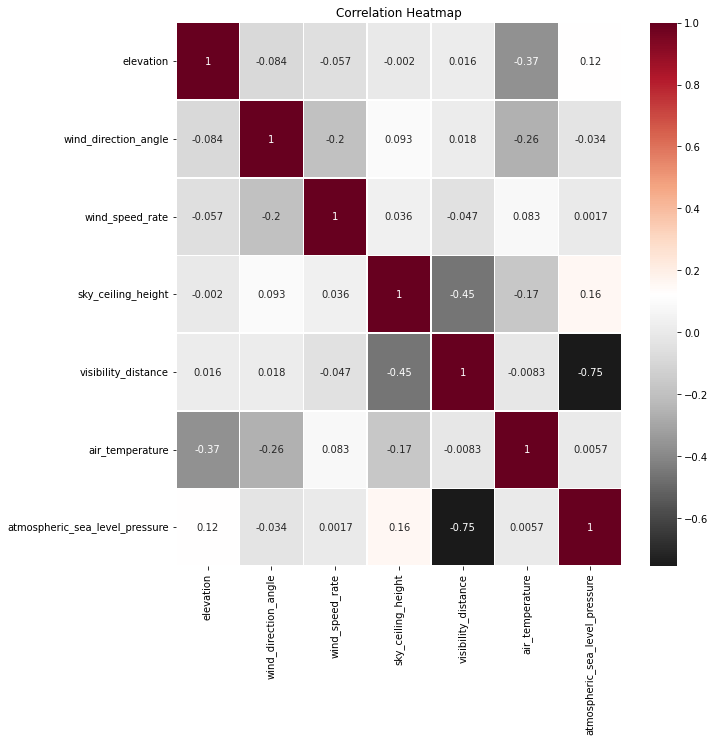

In [17]:
# Heatmap for dataset
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(c.corr(), annot=True, linewidths=.5,ax=ax, cmap=random.choice(pallete))
plt.title("Correlation Heatmap")

From our heatmap above, we can infer:

* we could get that there are no many variables having strong positive correlation.

* Feature 'visibility_distance' has a strong negative correlation with features 'atmospheric_sea_level_pressure' and 'sky_ceiling_height' with values -0.75 and -0.45 respectively